# Sampling

## Imports

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import mglearn

import matplotlib.pyplot as plt
%matplotlib inline

## Clear Data

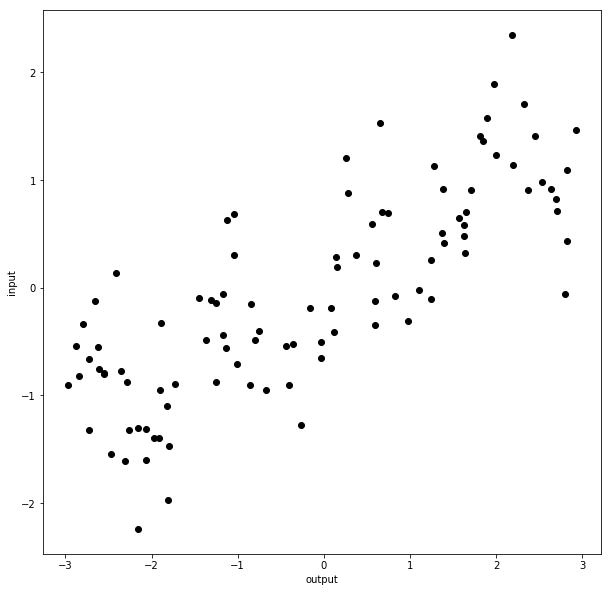

In [33]:
X, y = mglearn.datasets.make_wave(n_samples=100)

plt.figure(figsize=(10,10))
plt.ylabel("input")
plt.xlabel("output")
plt.plot(X[:, 0], y, 'o', c='k')

## Tree and Linear

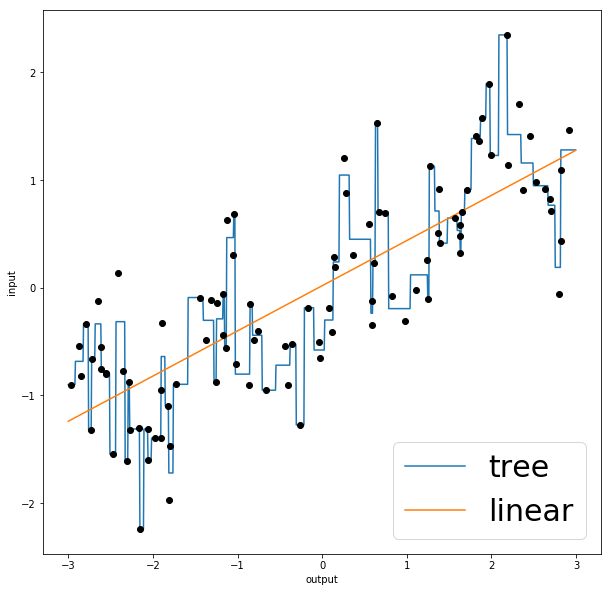

In [53]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.figure(figsize=(10,10))
plt.plot(line, reg.predict(line), label="tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("input")
plt.xlabel("output")
plt.legend(loc=4, prop={'size':30})

## Bins

In [37]:
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

## New models

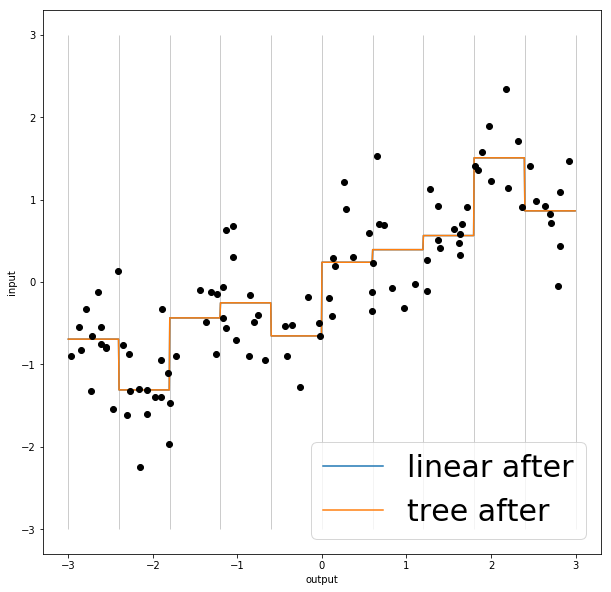

In [54]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.figure(figsize=(10,10))
plt.plot(line, reg.predict(line_binned), label='linear after')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='tree after')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel("input")
plt.xlabel("output")
plt.legend(loc=4, prop={'size':30})

## Combined Linear

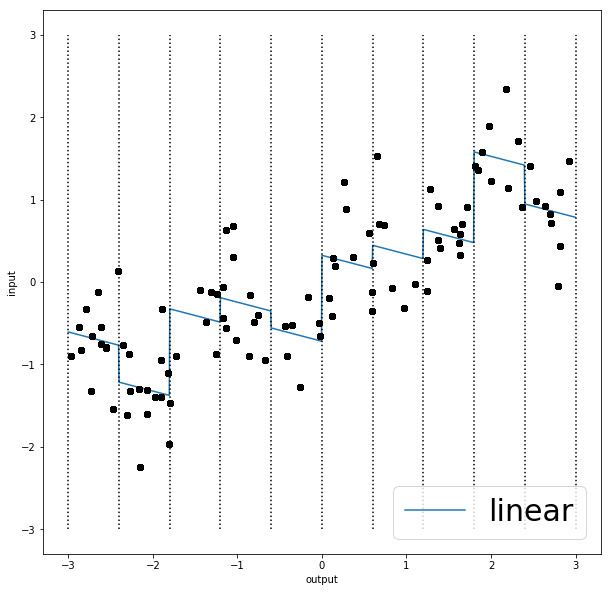

In [52]:
X_combined = np.hstack([X, X_binned])

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.figure(figsize=(10,10))
plt.plot(line, reg.predict(line_combined), label='linear')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.ylabel("input")
    plt.xlabel("output")
    plt.legend(loc=4, prop={'size':30})
    plt.plot(X[:, 0], y, 'o', c='k')

![gif](NW3t.gif)